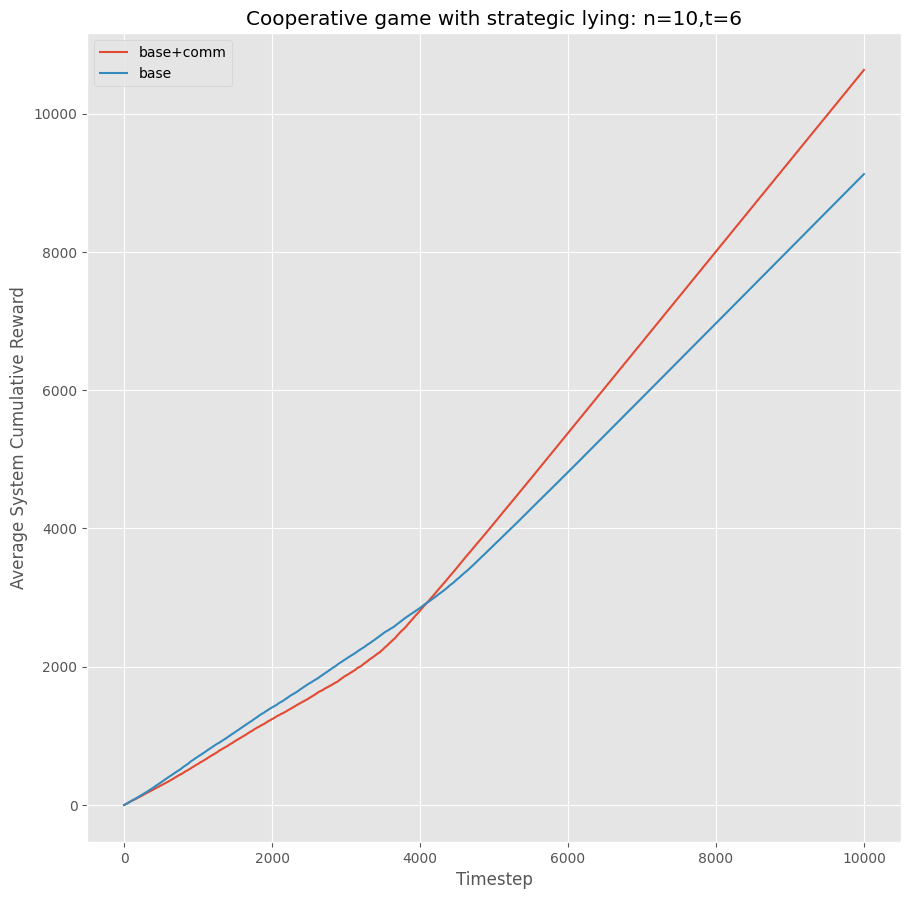

In [7]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import numpy as np

# set parameters
n = 10
t = 6

# load simulation results
cum_rew_1 = np.load(f'data/base_comm/n{n}t{t}_cum_rew_[-0.99,2].npy')
cum_rew_2 = np.load(f'data/base_model/n{n}t{t}_cum_rew_cnf0.npy')
#cum_rew_3 = np.load(f'data/base_comm/n{n}t{t}_cum_rew_[-0.99,3].npy')
#cum_rew_4 = np.load(f'data/base_comm/n{n}t{t}_cum_rew_[-0.99,5].npy')
# average over the simulations
cum_rew_1 = np.mean(cum_rew_1, axis=0)
cum_rew_2= np.mean(cum_rew_2, axis=0)
#cum_rew_3= np.mean(cum_rew_3, axis=0)
#cum_rew_4= np.mean(cum_rew_4, axis=0)
# plot cum rew graphs
plt.title(f'Cooperative game with strategic lying: n={n},t={t}')
plt.xlabel('Timestep')
plt.ylabel('Average System Cumulative Reward')

plt.plot(cum_rew_1, label='base+comm')
plt.plot(cum_rew_2, label='base')
#plt.plot(cum_rew_3, label='[-0.99,3]')
#plt.plot(cum_rew_4, label='[-0.99,5]')

fig = plt.gcf()
fig.set_size_inches(10.5, 10.5)

plt.legend()

Converged actions: [1.86 1.91 1.94 1.74 1.91 1.89 1.45 2.   1.93 1.82]


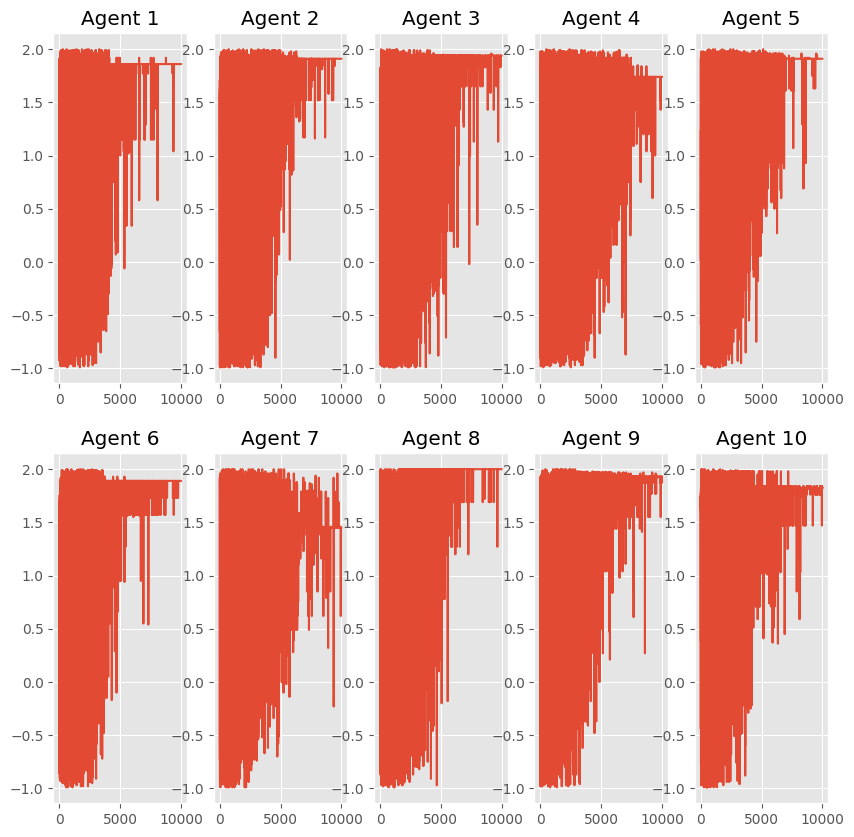

In [8]:
actions_1 = np.load(f'data/base_comm/n{n}t{t}_actions_[-0.99,2].npy')

print(f'Converged actions: {actions_1[-1,:]}')

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 10))
axes = axes.flatten()
for i in range(n):
    ax = axes[i]
    ax.plot(actions_1[:,i])
    ax.set_title(f'Agent {i + 1}')
